In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
import math
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
warnings.filterwarnings('ignore')

# Data

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(np.c_[data['data'], data['target']])
df.columns = list(data['feature_names']) + ['target']

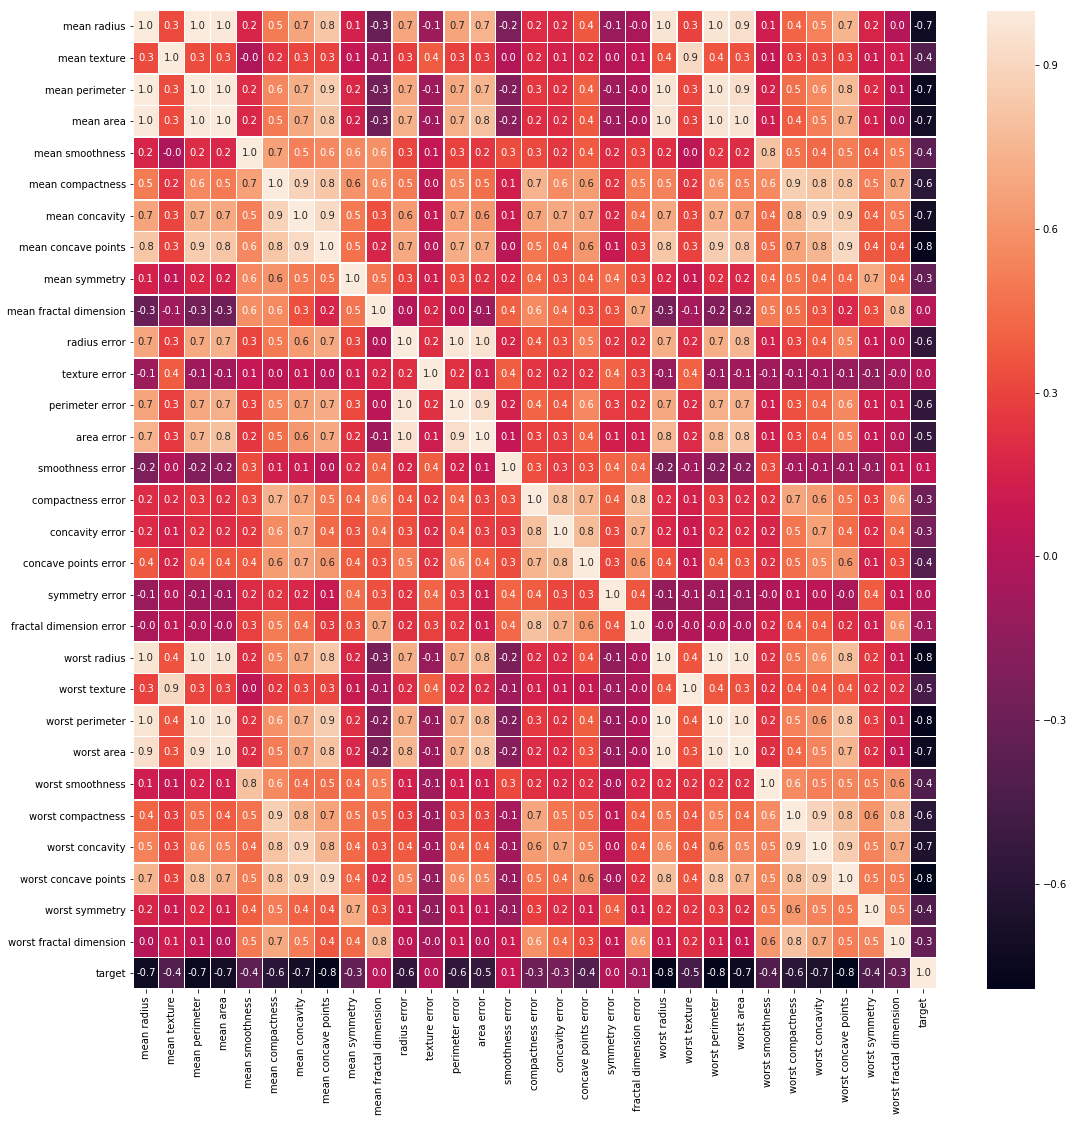

In [3]:
# Correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

*So input features are quite correlated, transform data first?*

## Split

In [4]:
train, test = train_test_split(df, test_size = 0.2)
X_train = train.drop('target', axis=1)
X_test = test.drop('target', axis=1)
Y_train = train["target"]
Y_test = test["target"]

# Models

## Decision Tree

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91        47
         1.0       0.94      0.93      0.93        67

   micro avg       0.92      0.92      0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

[0.83333333 0.83333333 0.83333333 0.75       1.         1.
 0.83333333 1.         0.9        0.8       ]
Average CV: 0.8783


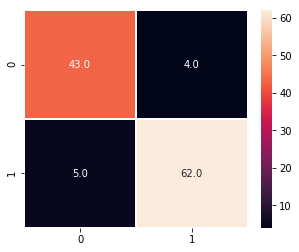

In [73]:
# Create the model
model_dt = DecisionTreeClassifier(criterion="gini", max_depth=4, max_features=1)
# Fit the model
model_dt.fit(X=X_train,y=Y_train)

# Prediction
predicion_dt = model_dt.predict(X_test)

#Results:

#Clasification report
results_dt = metrics.classification_report(y_true=Y_test, y_pred=predicion_dt)
print(results_dt)

#Confusion Matrix
cm_dt = metrics.confusion_matrix(y_true=Y_test, y_pred=predicion_dt)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

cv_dt = cross_val_score(model_dt, X_test, Y_test, cv=10)
print(cv_dt)
print("Average CV: {:.4f}".format(cv_dt.mean()))

In [91]:
def build_decision_tree(n_depth, n_features, criterion = "entropy"):
    # Create the model
    model_dt = DecisionTreeClassifier(criterion=criterion, random_state=13, 
                                      max_depth=n_depth, max_features=n_features)
    # Fit the model
    model_dt.fit(X=X_train,y=Y_train)

    # Prediction
    predicion_dt = model_dt.predict(X_test)

    #Confusion Matrix
    cm_dt = metrics.confusion_matrix(y_true=Y_test, y_pred=predicion_dt)
    return cm_dt[0,1] + cm_dt[1,0]

In [92]:
for depth in range(3,10):
    for features in range(1,30):
        print("{}:{} - {}".format(depth, features, build_decision_tree(depth, features)))
    

3:1 - 15
3:2 - 12
3:3 - 6
3:4 - 10
3:5 - 7
3:6 - 6
3:7 - 8
3:8 - 4
3:9 - 5
3:10 - 4
3:11 - 5
3:12 - 9
3:13 - 9
3:14 - 9
3:15 - 5
3:16 - 9
3:17 - 9
3:18 - 12
3:19 - 5
3:20 - 4
3:21 - 2
3:22 - 3
3:23 - 5
3:24 - 4
3:25 - 9
3:26 - 7
3:27 - 7
3:28 - 6
3:29 - 6
4:1 - 22
4:2 - 9
4:3 - 12
4:4 - 11
4:5 - 7
4:6 - 6
4:7 - 9
4:8 - 5
4:9 - 6
4:10 - 4
4:11 - 2
4:12 - 4
4:13 - 6
4:14 - 5
4:15 - 5
4:16 - 4
4:17 - 4
4:18 - 5
4:19 - 5
4:20 - 6
4:21 - 5
4:22 - 2
4:23 - 2
4:24 - 4
4:25 - 9
4:26 - 8
4:27 - 7
4:28 - 7
4:29 - 7
5:1 - 12
5:2 - 7
5:3 - 8
5:4 - 9
5:5 - 6
5:6 - 4
5:7 - 8
5:8 - 8
5:9 - 5
5:10 - 5
5:11 - 4
5:12 - 14
5:13 - 8
5:14 - 4
5:15 - 3
5:16 - 3
5:17 - 7
5:18 - 7
5:19 - 6
5:20 - 4
5:21 - 1
5:22 - 1
5:23 - 1
5:24 - 8
5:25 - 7
5:26 - 8
5:27 - 10
5:28 - 9
5:29 - 9
6:1 - 13
6:2 - 9
6:3 - 3
6:4 - 9
6:5 - 4
6:6 - 2
6:7 - 2
6:8 - 4
6:9 - 10
6:10 - 5
6:11 - 3
6:12 - 6
6:13 - 9
6:14 - 5
6:15 - 4
6:16 - 6
6:17 - 4
6:18 - 4
6:19 - 8
6:20 - 5
6:21 - 3
6:22 - 4
6:23 - 5
6:24 - 8
6:25 - 8
6:26 - 9
6:27 - 

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        47
         1.0       1.00      0.97      0.98        67

   micro avg       0.98      0.98      0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

[1.         0.83333333 1.         0.83333333 1.         1.
 0.91666667 1.         1.         1.        ]
Average CV: 0.9583


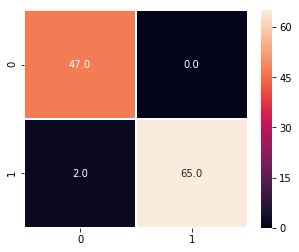

In [90]:
# Create the model
model_dt = DecisionTreeClassifier(criterion="entropy", random_state=13, max_depth=4, max_features=11)
# Fit the model
model_dt.fit(X=X_train,y=Y_train)

# Prediction
predicion_dt = model_dt.predict(X_test)

#Results:

#Clasification report
results_dt = metrics.classification_report(y_true=Y_test, y_pred=predicion_dt)
print(results_dt)

#Confusion Matrix
cm_dt = metrics.confusion_matrix(y_true=Y_test, y_pred=predicion_dt)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

cv_dt = cross_val_score(model_dt, X_test, Y_test, cv=10)
print(cv_dt)
print("Average CV: {:.4f}".format(cv_dt.mean()))

In [93]:
# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

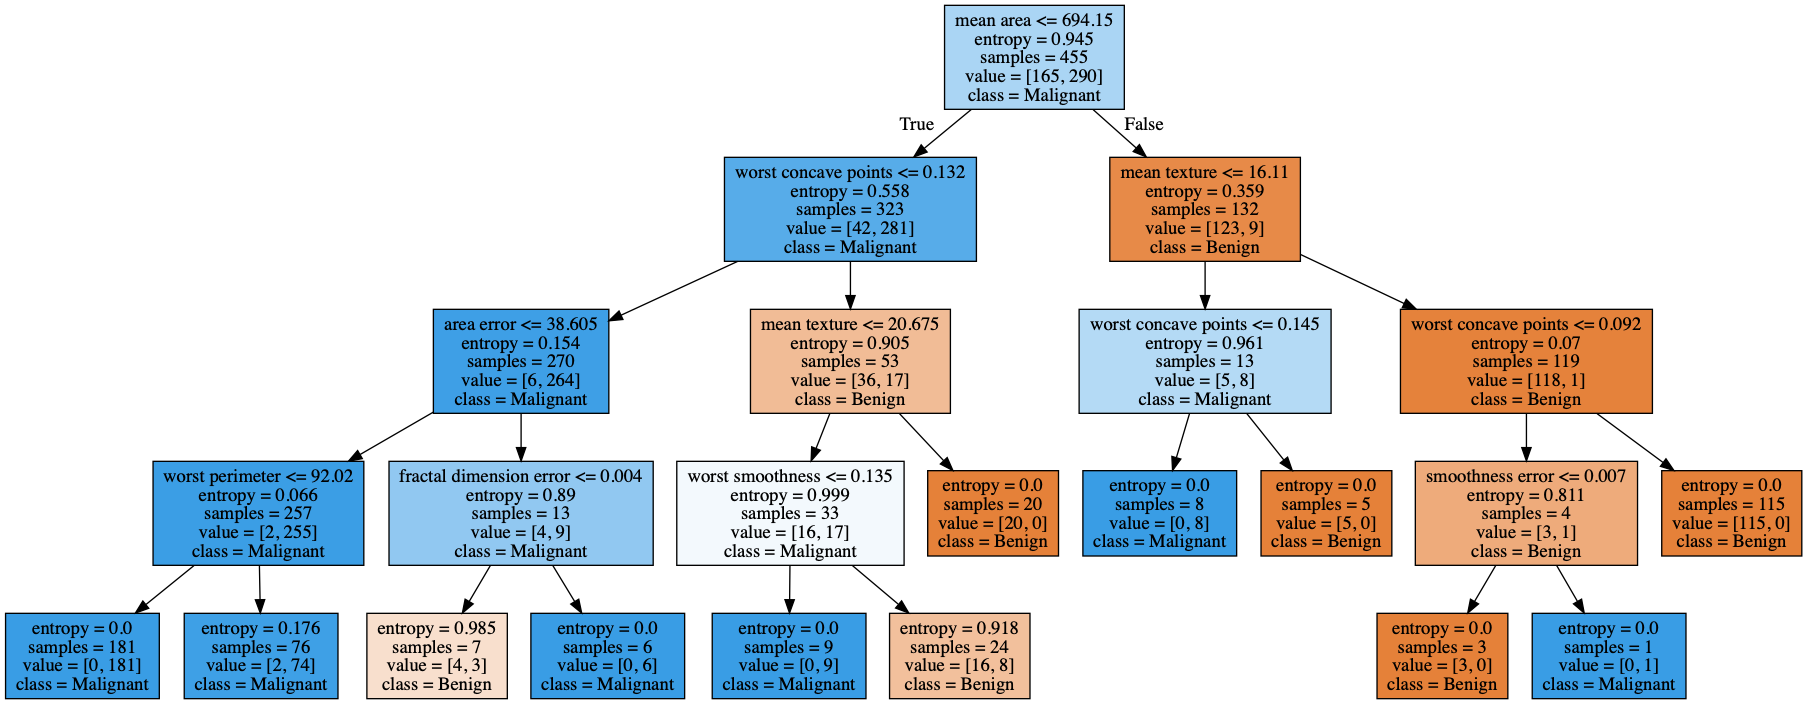

In [95]:
# Render our tree.
dot_data_dt = tree.export_graphviz(
    model_dt, out_file=None,
    feature_names=X_train.columns,
    class_names=['Benign', 'Malignant'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data_dt)
Image(graph.create_png())

# Random Forest

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        47
         1.0       0.99      0.99      0.99        67

   micro avg       0.98      0.98      0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[1.         0.75       1.         0.91666667 1.         1.
 0.91666667 1.         1.         1.        ]
Average CV: 0.9583


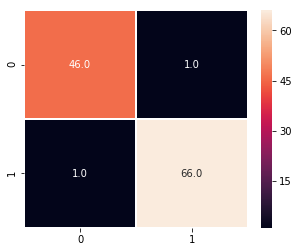

In [100]:
model_rf = RandomForestClassifier(criterion="entropy", random_state=13, 
                                  max_depth=4, max_features=11, n_estimators=500)

model_rf.fit(X_train,Y_train)

predicion_rf = model_rf.predict(X_test)
#Clasification report
results_rf = metrics.classification_report(y_true=Y_test, y_pred=predicion_rf)
print(results_rf)

#Confusion Matrix
cm_rf = metrics.confusion_matrix(y_true=Y_test, y_pred=predicion_rf)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

cv_rf = cross_val_score(model_rf, X_test, Y_test, cv=10)
print(cv_rf)
print("Average CV: {:.4f}".format(cv_rf.mean()))